In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()
# df['Survived'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Sex and Pclass

print (df.groupby('Sex')['Survived'].agg(['mean','count']))

print (df.groupby('Pclass')['Survived'].agg(['mean','count']))

            mean  count
Sex                    
female  0.742038    314
male    0.188908    577
            mean  count
Pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491


In [5]:
# age is nan
df_na = df[pd.isnull(df['Age'])]
#df_na.info()

print (df_na.groupby('Sex')['Survived'].agg(['mean','count']))

print (df_na.groupby('Pclass')['Survived'].agg(['mean','count']))

            mean  count
Sex                    
female  0.679245     53
male    0.129032    124
            mean  count
Pclass                 
1       0.466667     30
2       0.363636     11
3       0.250000    136


mean  count
Age_bin                       
(0.419, 19.0]  0.481707    164
(19.0, 25.0]   0.328467    137
(25.0, 31.8]   0.393701    127
(31.8, 41.0]   0.437500    144
(41.0, 80.0]   0.373239    142

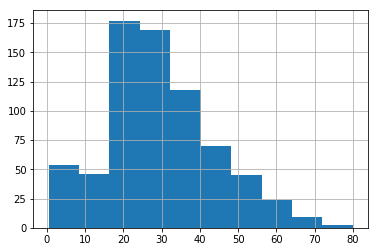

In [6]:
# age not nan
df['Age'].hist()
df['Age_bin'] = pd.qcut(df['Age'],5)
df.groupby('Age_bin')['Survived'].agg(['mean','count'])

In [7]:
# sibsp and parch
print (df.groupby('SibSp')['Survived'].agg(['mean','count']))
print (df.groupby('Parch')['Survived'].agg(['mean','count']))

           mean  count
SibSp                 
0      0.345395    608
1      0.535885    209
2      0.464286     28
3      0.250000     16
4      0.166667     18
5      0.000000      5
8      0.000000      7
           mean  count
Parch                 
0      0.343658    678
1      0.550847    118
2      0.500000     80
3      0.600000      5
4      0.000000      4
5      0.200000      5
6      0.000000      1


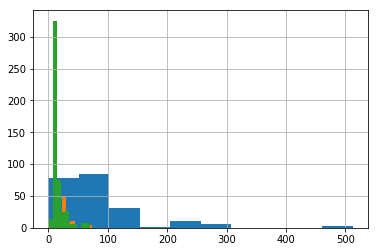

In [8]:
# Fare
df.query('Pclass==1')['Fare'].hist()
df.query('Pclass==2')['Fare'].hist()
df.query('Pclass==3')['Fare'].hist()

In [9]:
# cabin
df['Cabin_group'] = df['Cabin'].dropna().str[0]
df.groupby(['Cabin_group','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Cabin_group Pclass                                                        
A           1                15        15    15   15   12     15     15   
B           1                47        47    47   47   45     47     47   
C           1                59        59    59   59   51     59     59   
D           1                29        29    29   29   27     29     29   
            2                 4         4     4    4    4      4      4   
E           1                25        25    25   25   24     25     25   
            2                 4         4     4    4    3      4      4   
            3                 3         3     3    3    3      3      3   
F           2                 8         8     8    8    8      8      8   
            3                 5         5     5    5    3      5      5   
G           3                 4         4     4    4    4      4      4   
T           1                 1         1     1    1    1      1      1   

                    Ticket  Fare  Cabin  Embarked  Age_bin  
Cabin_group Pclass                                          
A           1           15    15     15        15       12  
B           1           47    47     47        45       45  
C           1           59    59     59        59       51  
D           1           29    29     29        29       27  
            2            4     4      4         4        4  
E           1           25    25     25        25       24  
            2            4     4      4         4        3  
            3            3     3      3         3        3  
F           2            8     8      8         8        8  
            3            5     5      5         5        3  
G           3            4     4      4         4        4  
T           1            1     1      1         1        1

In [10]:
# embarked
df.groupby(['Embarked']).agg(['mean','count'])

PassengerId        Survived          Pclass              Age        \
                mean count      mean count      mean count       mean count   
Embarked                                                                      
C         445.357143   168  0.553571   168  1.886905   168  30.814769   130   
Q         417.896104    77  0.389610    77  2.909091    77  28.089286    28   
S         449.527950   644  0.336957   644  2.350932   644  29.445397   554   

             SibSp           Parch             Fare        
              mean count      mean count       mean count  
Embarked                                                   
C         0.386905   168  0.363095   168  59.954144   168  
Q         0.428571    77  0.168831    77  13.276030    77  
S         0.571429   644  0.413043   644  27.079812   644

2) varibles we want to keep
    pclass catagorical  x3
    sex cat x2 
    age cat x2   >18 or not 
    sibsp cat x2 >0 or not 
    parch cat x2 >0 or not 

In [11]:
df['age_cat'] = df['Age']<=18 
df['sibsp_cat'] = df['SibSp']==0
df['parch_cat'] = df['Parch']==0
pred_table = df.groupby(['Pclass','Sex','age_cat','sibsp_cat','parch_cat'])['Survived'].agg(['mean','count']).reset_index()
pred_table.head()

Pclass     Sex  age_cat  sibsp_cat  parch_cat      mean  count
0       1  female    False      False      False  0.916667     12
1       1  female    False      False       True  1.000000     27
2       1  female    False       True      False  1.000000     11
3       1  female    False       True       True  0.969697     33
4       1  female     True      False      False  0.666667      3

In [12]:
dft = pd.read_csv('test.csv')
dft['age_cat'] = dft['Age']<=18 
dft['sibsp_cat'] = dft['SibSp']==0
dft['parch_cat'] = dft['Parch']==0

In [13]:
res = pd.merge(left = dft, right = pred_table, on=['Pclass','Sex','age_cat','sibsp_cat','parch_cat'], how='left')
res['Survived'] = (res['mean']>0.5).astype(int)
res[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m1.csv')

In [17]:
# model 1 submit 2
pred_table_2 = df.groupby(['Pclass','Sex','age_cat'])['Survived'].agg(['mean','count']).reset_index()
#pred_table_2
res2 = pd.merge(left = dft, right = pred_table_2, on=['Pclass','Sex','age_cat'], how='left')
res2['Survived'] = (res2['mean']>0.5).astype(int)
res2[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m1s2.csv')

In [18]:
# model 1 submit 3
feature_set = ['Pclass','Sex']
no_model=1
no_sub=3
pred_table_2 = df.groupby(feature_set)['Survived'].agg(['mean','count']).reset_index()
#pred_table_2
res2 = pd.merge(left = dft, right = pred_table_2, on=feature_set, how='left')
res2['Survived'] = (res2['mean']>0.5).astype(int)
res2[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m{}s{}.csv'.format(no_model,no_sub))

In [19]:
# model 1 submit 4
feature_set = ['age_cat','Sex']
no_model=1
no_sub=4
pred_table_2 = df.groupby(feature_set)['Survived'].agg(['mean','count']).reset_index()
#pred_table_2
res2 = pd.merge(left = dft, right = pred_table_2, on=feature_set, how='left')
res2['Survived'] = (res2['mean']>0.5).astype(int)
res2[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m{}s{}.csv'.format(no_model,no_sub))

In [20]:
# model 1 submit 5
feature_set = ['Pclass','Sex','age_cat','sibsp_cat']
no_model=1
no_sub=5
pred_table_2 = df.groupby(feature_set)['Survived'].agg(['mean','count']).reset_index()
#pred_table_2
res2 = pd.merge(left = dft, right = pred_table_2, on=feature_set, how='left')
res2['Survived'] = (res2['mean']>0.5).astype(int)
res2[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m{}s{}.csv'.format(no_model,no_sub))

In [21]:
# model 1 submit 6
feature_set = ['Pclass','Sex','age_cat','parch_cat']
no_model=1
no_sub=6
pred_table_2 = df.groupby(feature_set)['Survived'].agg(['mean','count']).reset_index()
#pred_table_2
res2 = pd.merge(left = dft, right = pred_table_2, on=feature_set, how='left')
res2['Survived'] = (res2['mean']>0.5).astype(int)
res2[['PassengerId','Survived']].set_index('PassengerId').to_csv('sub_m{}s{}.csv'.format(no_model,no_sub))